# Jupyterlab Sandbox
<img src="./00_Admin/sample_files/logos/sandbox.svg" width="150" />

In [ ]:
pwd

In [1]:
!sensors

nct6776-isa-0a00
Adapter: ISA adapter
Vcore:                  +0.82 V  (min =  +0.00 V, max =  +1.74 V)
in1:                    +1.02 V  (min =  +0.00 V, max =  +0.00 V)  ALARM
AVCC:                   +3.36 V  (min =  +2.98 V, max =  +3.63 V)
+3.3V:                  +3.36 V  (min =  +2.98 V, max =  +3.63 V)
in4:                    +1.03 V  (min =  +0.00 V, max =  +0.00 V)  ALARM
in5:                    +0.98 V  (min =  +0.00 V, max =  +0.00 V)  ALARM
in6:                    +1.06 V  (min =  +0.00 V, max =  +0.00 V)  ALARM
3VSB:                   +3.36 V  (min =  +2.98 V, max =  +3.63 V)
Vbat:                   +3.31 V  (min =  +2.70 V, max =  +3.63 V)
fan1:                     0 RPM  (min =    0 RPM)
fan2:                     0 RPM  (min =    0 RPM)
fan3:                     0 RPM  (min =    0 RPM)
SYSTIN:                 +43.0°C  (high =  +0.0°C, hyst =  +0.0°C)  ALARM  sensor = CPU diode
CPUTIN:                 +44.0°C  (high = +80.0°C, hyst = +75.0°C)  sensor = CPU diode
AUXTIN:    

In [6]:
import os
size = os.path.getsize("/mnt/data/multimedia/Music/Podcast/La Planète Bleue/2019/20190104 - La Planète Bleue - no 962_test.mp3")
size

0

In [1]:
import urllib.request
from urllib.parse import urlparse
import math

dlmp3 = urllib.request.urlopen("https://podcast.radiovostok.ch/laplanetebleue/media/2019-01-04_pad_planete_962_-_podcast_-_16bits.mp3")
length = dlmp3.getheader('content-length')
if length:
  length = int(length)
  blocksize = max(4096, length//100)
else:
  blocksize = 100000000//100 # just made something up (100MB/100)
blocnumber = 1

print("length    = {}".format(length))
print("blocksize = {}".format(blocksize))

with open("test.mp3", 'wb') as file:
  while True:
    chunk = dlmp3.read(blocksize)
    if not chunk:
      break
    file.write(chunk)
    percent = int(((blocksize*blocnumber)/length*100))
    percentbar = math.floor(percent/10)
    print("\r Downloading {}% [".format(percent)+(percentbar-1)*"="+">"+(10-percentbar)*" "+"]",end="")
    blocnumber += 1


length    = 108600972
blocksize = 1086009

In [5]:
import mutagen.mp3
import mutagen.id3

# Read ID3 tag or create it if not present
try: 
  tags = mutagen.id3.ID3("test.mp3")
except mutagen.id3.ID3NoHeaderError:
  print("Adding ID3 header")
  tags = mutagen.id3.ID3()

tags["TIT2"] = mutagen.id3.TIT2(encoding=3, text=u'title')
tags["TALB"] = mutagen.id3.TALB(encoding=3, text=u'mutagen Album Name')
tags["TPE2"] = mutagen.id3.TPE2(encoding=3, text=u'mutagen Band')
tags["COMM"] = mutagen.id3.COMM(encoding=3, lang=u'eng', desc='desc', text=u'mutagen comment')
tags["TPE1"] = mutagen.id3.TPE1(encoding=3, text=u'mutagen Artist')
tags["TCOM"] = mutagen.id3.TCOM(encoding=3, text=u'mutagen Composer')
tags["TCON"] = mutagen.id3.TCON(encoding=3, text=u'mutagen Genre')
tags["TDRC"] = mutagen.id3.TDRC(encoding=3, text=u'2010')
tags["TRCK"] = mutagen.id3.TRCK(encoding=3, text=u'track_number')
tags.save("test.mp3")

In [6]:
import mutagen.mp3
import mutagen.id3
try: 
  tags = mutagen.id3.ID3("test.mp3")
  print(tags)
except mutagen.id3.ID3NoHeaderError:
  print("No id3 Tags Present")

{'TIT2': TIT2(encoding=<Encoding.UTF8: 3>, text=['title']), 'TPE1': TPE1(encoding=<Encoding.UTF8: 3>, text=['mutagen Artist']), 'TRCK': TRCK(encoding=<Encoding.UTF8: 3>, text=['track_number']), 'TALB': TALB(encoding=<Encoding.UTF8: 3>, text=['mutagen Album Name']), 'TDRC': TDRC(encoding=<Encoding.UTF8: 3>, text=['2010']), 'TCON': TCON(encoding=<Encoding.UTF8: 3>, text=['mutagen Genre']), 'TPE2': TPE2(encoding=<Encoding.UTF8: 3>, text=['mutagen Band']), 'TCOM': TCOM(encoding=<Encoding.UTF8: 3>, text=['mutagen Composer']), 'COMM:desc:eng': COMM(encoding=<Encoding.UTF8: 3>, lang='eng', desc='desc', text=['mutagen comment'])}


In [ ]:
from mutagen.mp3 import MP3
from mutagen.id3 import ID3NoHeaderError
from mutagen.id3 import ID3, TIT2, TALB, TPE1, TPE2, COMM, USLT, TCOM, TCON, TDRC

# Read ID3 tag or create it if not present
try: 
    tags = ID3(fname)
except ID3NoHeaderError:
    print("Adding ID3 header")
    tags = ID3()

tags["TIT2"] = TIT2(encoding=3, text=title)
tags["TALB"] = TALB(encoding=3, text=u'mutagen Album Name')
tags["TPE2"] = TPE2(encoding=3, text=u'mutagen Band')
tags["COMM"] = COMM(encoding=3, lang=u'eng', desc='desc', text=u'mutagen comment')
tags["TPE1"] = TPE1(encoding=3, text=u'mutagen Artist')
tags["TCOM"] = TCOM(encoding=3, text=u'mutagen Composer')
tags["TCON"] = TCON(encoding=3, text=u'mutagen Genre')
tags["TDRC"] = TDRC(encoding=3, text=u'2010')
tags["TRCK"] = TRCK(encoding=3, text=u'track_number')


/home/zas/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


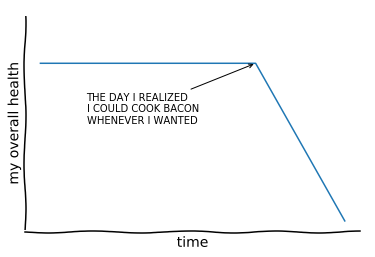

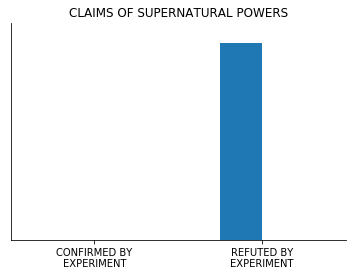

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

plt.xkcd()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.xticks([])
plt.yticks([])
ax.set_ylim([-30, 10])

data = np.ones(100)
data[70:] -= np.arange(30)

plt.annotate(
    'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
    xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

plt.plot(data)

plt.xlabel('time')
plt.ylabel('my overall health')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar([-0.125, 1.0-0.125], [0, 100], 0.25)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks([0, 1])
ax.set_xlim([-0.5, 1.5])
ax.set_ylim([0, 110])
ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
plt.yticks([])

plt.title("CLAIMS OF SUPERNATURAL POWERS")

plt.show()